In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [3]:
DATA = Path("../../data")

In [11]:
train_data = pd.read_csv(DATA / "train_missing_value_80per_under.csv")

In [12]:
train_data.head(10)

,class,stem-height,stem-width,season,cap-diameter,does-bruise-or-bleed,cap-color,has-ring,stem-color,cap-shape,habitat,gill-color,ring-type,gill-attachment,cap-surface,gill-spacing,stem-surface
0,e,4.51,15.39,a,8.80,f,u,f,w,f,d,w,f,a,s,c,NaN
1,p,4.79,6.48,w,4.51,f,o,t,o,x,d,n,z,a,h,c,y
2,e,6.85,9.93,w,6.94,f,b,f,n,f,l,w,f,x,s,c,s
3,e,4.16,6.53,u,3.88,f,g,f,w,f,d,g,f,s,y,NaN,NaN
4,e,3.37,8.36,a,5.85,f,w,f,w,x,g,w,f,d,l,NaN,NaN
5,p,5.91,8.20,a,4.30,f,n,t,w,x,d,n,z,s,t,c,NaN
6,e,19.07,12.69,w,9.65,f,w,t,w,p,g,k,e,e,y,c,s
7,p,8.31,9.77,a,4.55,f,e,t,y,x,d,y,z,a,e,NaN,NaN
8,p,5.77,17.13,a,7.36,f,e,f,w,f,d,w,f,x,h,d,NaN
9,e,7.13,12.77,a,6.45,f,n,f,e,x,d,w,f,a,t,d,NaN


In [13]:
for column in train_data.columns[1:]:
    print(f"== {column} ==")
    print(f"{train_data[column].unique()}")

== stem-height ==
[ 4.51  4.79  6.85 ... 26.09 47.33 26.53]
== stem-width ==
[15.39  6.48  9.93 ... 66.91 79.92 53.44]
== season ==
['a' 'w' 'u' 's']
== cap-diameter ==
[ 8.8   4.51  6.94 ... 38.11 55.63 54.07]
== does-bruise-or-bleed ==
['f' 't' 'd' 'has-ring' 'w' 'o' 'b' 'x' 'p' nan 'g' 'y' 'r' 'a' 'l' 'i'
 'c' 'n' 'z' 's' 'k' 'h' '3.43' 'e' '4.42' '2.9' 'u']
== cap-color ==
['u' 'o' 'b' 'g' 'w' 'n' 'e' 'y' 'r' 'p' 'k' 'l' 'i' 'h' 'd' 's' 'a' 'f'
 '2.05' 'season' 'c' 'x' '13' '7.72' 'm' 'z' '6.76' '7.15' 't' 'ring-type'
 nan 'class' '12.89' '8.83' '24.75' '22.38' '1.51' '10.1' '17.94' '3.57'
 'does n' '4.89' '6.2' '21.53' '6.41' '4.98' '3.95' 'does-bruise-or-bleed'
 '6.59' '5.25' 'veil-color' '6.9' '5.41' '11.13' '3.11' '2.57' '17.93'
 '2.7' '8.57' '11.92' '3.08' '2.82' '4.24' '17.19' '3.34' '7' '2.9' '6.36'
 '5.91' '10.56' '26.89' '4. n' '20.62' 'stem-surface' '20.02' '20' '25.98'
 '8.67' '9.02']
== has-ring ==
['f' 't' 'h' 'r' 'y' 'c' 'e' 'g' 'l' 's' nan 'p' 'x' 'k' 'z' 'f has-ring

## Numerical Feature

In [14]:
numerical = train_data.select_dtypes(include=["float"]).columns
numerical

Index(['stem-height', 'stem-width', 'cap-diameter'], dtype='object')

<Axes: xlabel='class', ylabel='stem-height'>

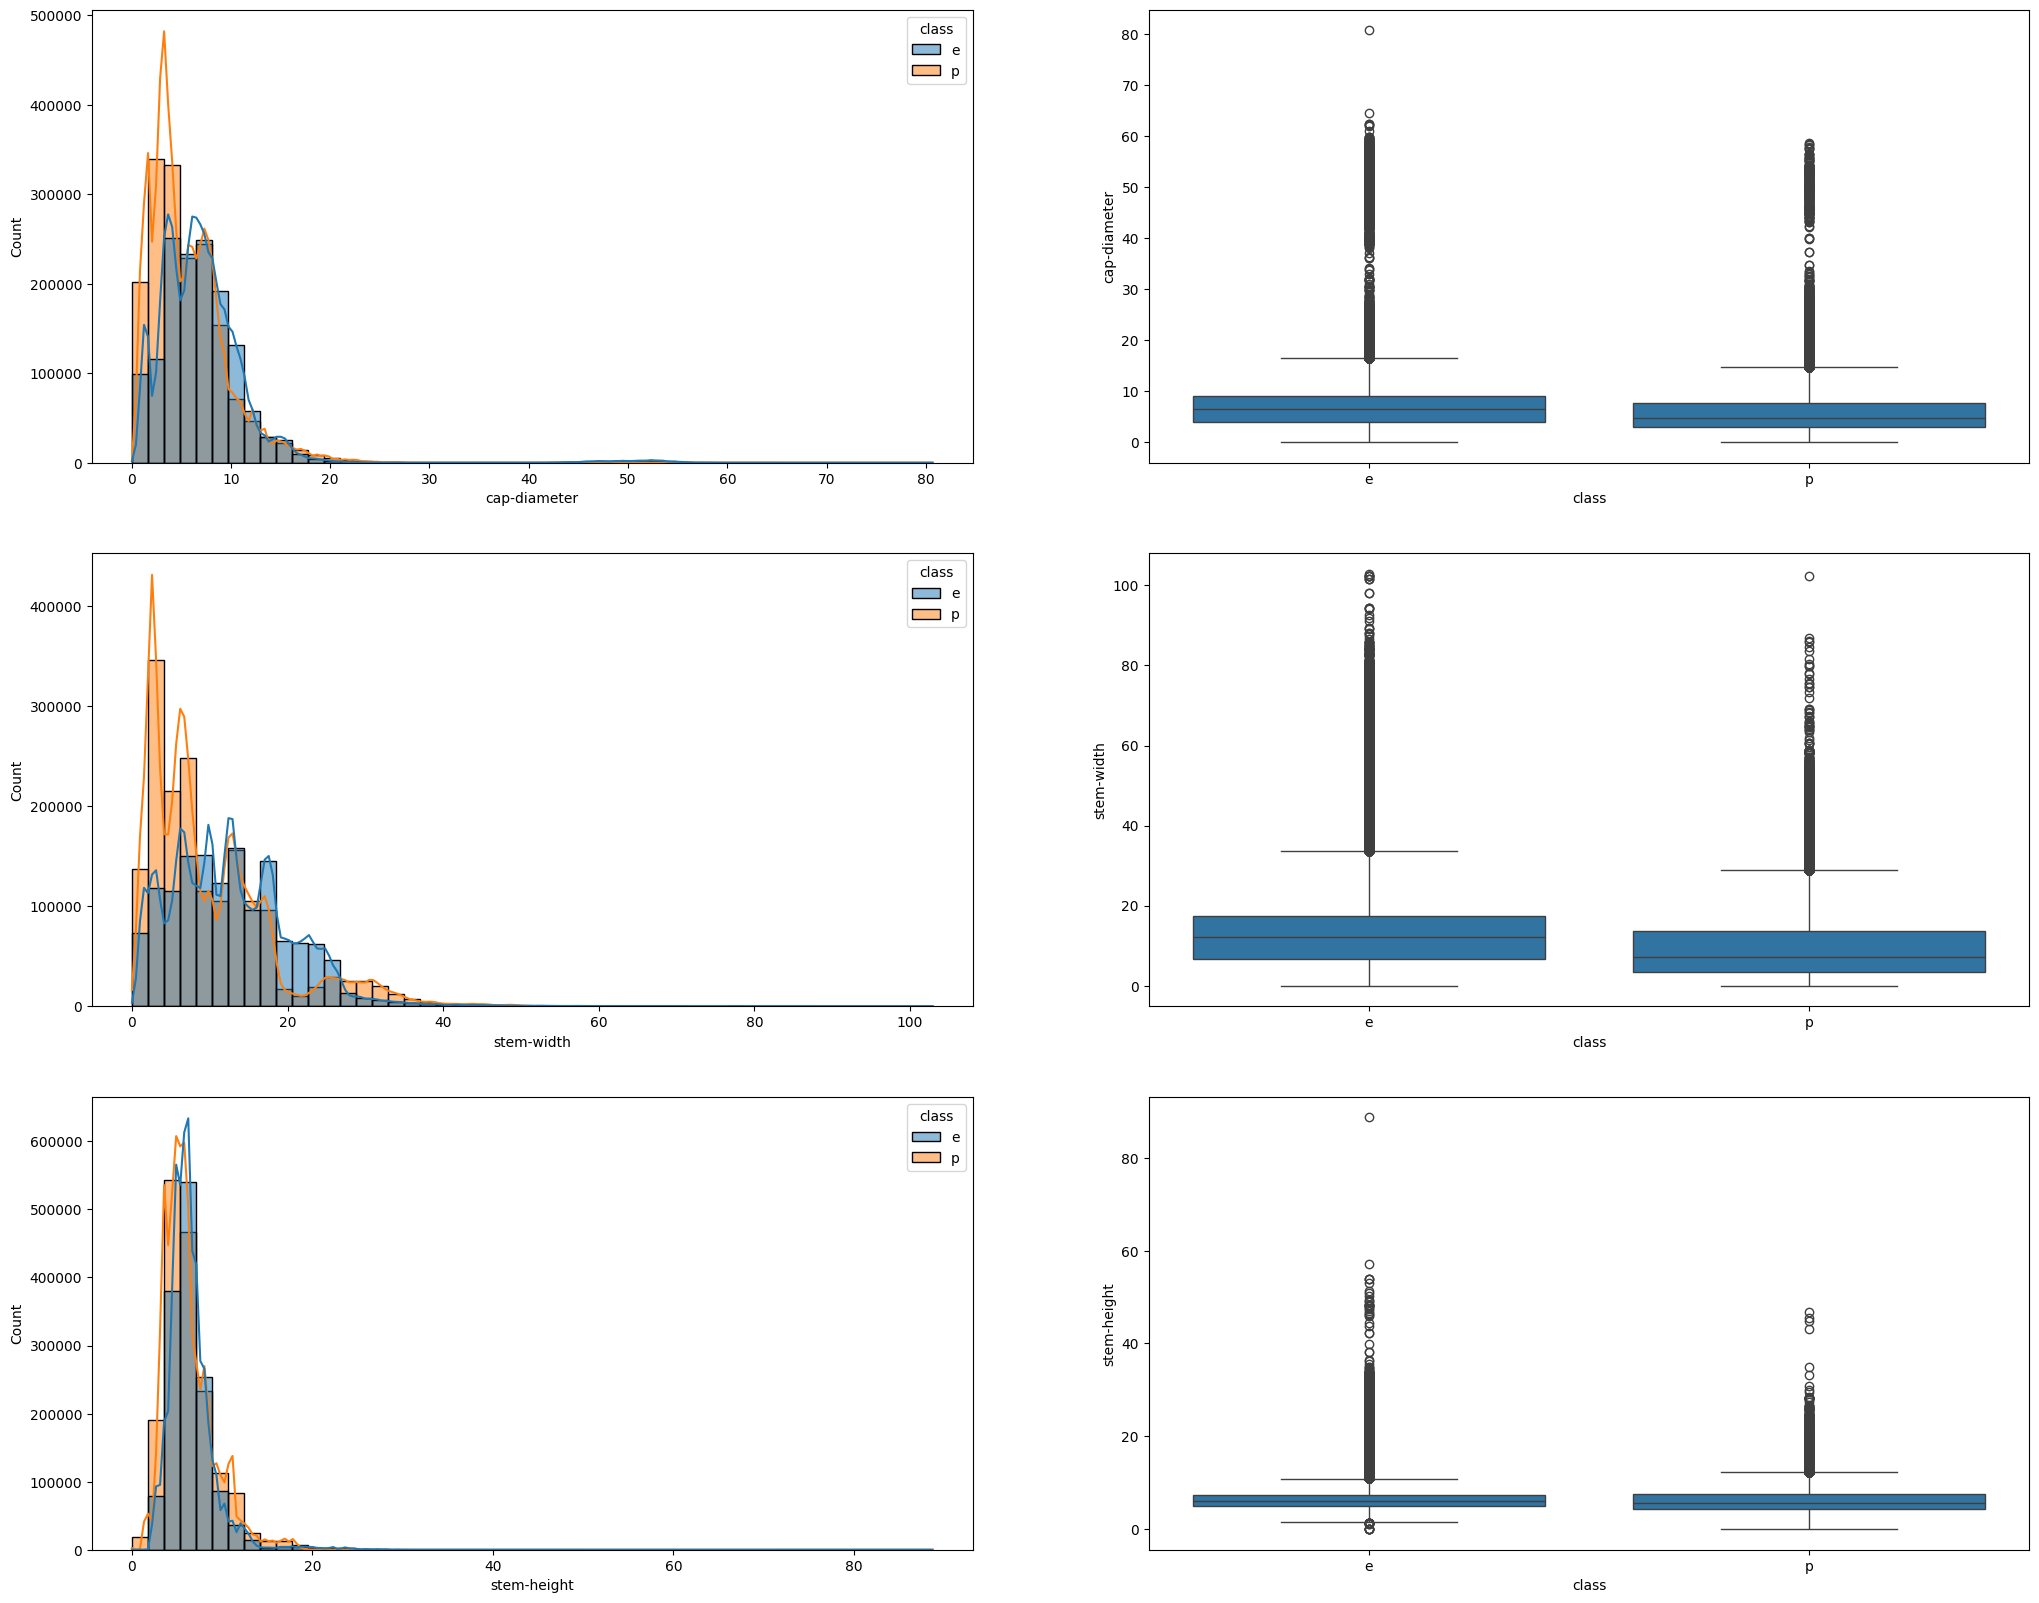

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 20))

sns.histplot(train_data, x="cap-diameter", hue="class", bins=50, kde=True, ax=axes[0][0])
sns.boxplot(train_data, x="class", y="cap-diameter", ax=axes[0][1])


sns.histplot(train_data, x="stem-width", hue="class", bins=50, kde=True, ax=axes[1][0])
sns.boxplot(train_data, x="class", y="stem-width", ax=axes[1][1])

sns.histplot(train_data, x="stem-height", hue="class", bins=50, kde=True, ax=axes[2][0])
sns.boxplot(train_data, x="class", y="stem-height", ax=axes[2][1])

* IQR 방식으로 'e', 'p' 각각 이상치를 검출해 결측치로 바꾼 후 KNN으로 다시 채우기
* 이후 데이터를 다시 확인, 계속해서 right skew 발생 시 log1p 사용
  

## Categorical Feature

In [17]:
categorical = train_data.select_dtypes(include=["object"]).columns[1:] # class 제외
categorical

Index(['season', 'does-bruise-or-bleed', 'cap-color', 'has-ring', 'stem-color', 'cap-shape', 'habitat', 'gill-color', 'ring-type', 'gill-attachment', 'cap-surface', 'gill-spacing', 'stem-surface'], dtype='object')

In [36]:
for column in categorical:
    print(f"\nValue counts in '{column}':\n{train_data[column].value_counts()}")


Value counts in 'season':
season
a    1543321
u    1153588
w     278189
s     141847
Name: count, dtype: int64

Value counts in 'does-bruise-or-bleed':
does-bruise-or-bleed
f           2569743
t            547085
w                14
c                11
h                 9
a                 7
b                 7
x                 7
y                 7
k                 6
s                 6
e                 4
l                 4
p                 4
d                 4
g                 3
z                 3
o                 3
i                 2
n                 2
r                 1
has-ring          1
3.43              1
4.42              1
2.9               1
u                 1
Name: count, dtype: int64

Value counts in 'cap-color':
cap-color
n                       1359542
y                        386627
w                        379442
g                        210825
e                        197290
o                        178847
p                         91838
r               

In [37]:
for column in categorical:
    value_counts_10per_upper = train_data[column].value_counts() / train_data.shape[0] * 100
    print(f"\nValue percents in '{column}':\n{value_counts_10per_upper}")


Value percents in 'season':
season
a    49.513899
u    37.010214
w     8.925053
s     4.550834
Name: count, dtype: float64

Value percents in 'does-bruise-or-bleed':
does-bruise-or-bleed
f           82.444284
t           17.551962
w            0.000449
c            0.000353
h            0.000289
a            0.000225
b            0.000225
x            0.000225
y            0.000225
k            0.000192
s            0.000192
e            0.000128
l            0.000128
p            0.000128
d            0.000128
g            0.000096
z            0.000096
o            0.000096
i            0.000064
n            0.000064
r            0.000032
has-ring     0.000032
3.43         0.000032
4.42         0.000032
2.9          0.000032
u            0.000032
Name: count, dtype: float64

Value percents in 'cap-color':
cap-color
n                       43.617773
y                       12.404037
w                       12.173522
g                        6.763834
e                        6.329595


- 전체 데이터에서 1% 미만인 value를 결측 처리 혹은 Unknown처리